## Implementing Bidirectional LSTMs with Python and Keras

Based on the [ML Mastery Bidirectional LSTM tutorial](https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/)

Bidirectional Recurrent Neural Networks (RNNs) uses a reversed copy of the input sequence to a second recurrent layer of the network.

The application of Long Short-Term Memory (LSTM) Recurrent Neural Networks in speech recognition is based on the observation that speech is best understood when not when interpreted linearly but in the context of the complete utterance.

This notebook will apply Bidirectional LSTM to a simple sequence classification problem and compare the performance of different merge modes.

In [34]:
from numpy import array
from numpy import cumsum
from pandas import DataFrame
from random import random
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional
from matplotlib import pyplot

### Dataset is a sequence of random values

In [35]:
# Given a sequence of random values between 0 and 1,
# assign an output of 0,
# sum up the sequence, and
# when a threshold is reached, assign an output of 1
# Also, reshape the input and output sequences to be 3-dimensional 
# and suitable for LSTM: [samples, timesteps, features]

def get_sequence(n_timesteps):
    X = array([random() for _ in range(n_timesteps)])
    limit = n_timesteps/4.0
    y = array([0 if x < limit else 1 for x in cumsum(X)])    
    
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)

    return X, y


### Create a model for LSTM

In [36]:
# Input layer: 10 timesteps with one feature each
# First hidden layer: 20 memory units
# Output layer: fully, connectected, one value per timestep
# Activation: sigmoid function to predict binary value
# Wrapper layer: TimeDistributed, receives sequence from hidden layer
# Loss function: binary_crossentropy (binary log loss)
# Optimization: ADAM, assign weights
# Metric: accuracy reported for each epoch (pass as a list)
# LSTM (as-is)
# Additional param: go_backwards to pass reversed input sequences
def get_lstm_model(n_timesteps, backwards):
    model = Sequential()
    model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    return model

In [40]:
# Create a model for Bidirectional LSTM
# Similar to above but wrap LSTM hidden layer
# Merge mode specifies how the forward and backward outputs
# should be combined before being passed on to the next layer
# TimeDistributed receives twice as many timestamps
def get_bi_lstm_model(n_timesteps, mode):
    model = Sequential()
    model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    return model


In [41]:
# Train the model
def train_model(model, n_timesteps):
    loss = list()
    for _ in range(250):
        X, y = get_sequence(n_timesteps)
        hist = model.fit(X, y, epochs=1, batch_size=1, verbose=2)
        loss.append(hist.history['loss'][0])
    
    return loss

### Create, fit and plot the log loss values of three models

In [44]:
n_timesteps = 10
results = DataFrame()

# LSTM
model = get_lstm_model(n_timesteps, False)
results['lstm_forward'] = train_model(model, n_timesteps)

# LSTM with reversed input
model = get_lstm_model(n_timesteps, True)
results['lstm_backward'] = train_model(model, n_timesteps)

# Bidirectional LSTM
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bi_lstm_concat'] = train_model(model, n_timesteps)

Epoch 1/1
1s - loss: 0.6938 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6865 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6781 - acc: 0.6000
Epoch 1/1
0s - loss: 0.7087 - acc: 0.1000
Epoch 1/1
0s - loss: 0.6741 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6850 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6644 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6862 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6842 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6744 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6683 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6560 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6688 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6479 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6535 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6562 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6365 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6444 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6468 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6742 - acc: 0.4000
Epoch 1/1
0s - loss: 0.6515 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6168 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6219 - acc: 0.7000
Epoch 1/1
0s - loss: 0.5884 - acc:

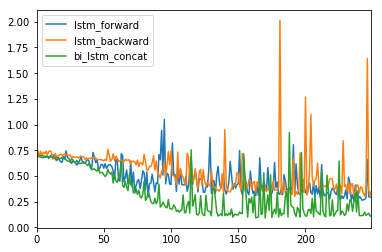

In [43]:
# Plot the results
results.plot()
pyplot.show()